# Analiza sytuacji kredytobiorców w Stanach Zjednoczonych oraz odkrywanie relacji pomiędzy pożyczkami, a aspektami socjoekonomicznymi i geopolitycznymi.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import itertools

In [2]:
colors = [(0, 18, 25), (0, 95, 115), (10, 147, 150), (148, 210, 189), (233, 216, 166), (238, 155, 0), (202, 103, 2), (187, 62, 3), (174, 32, 18), (155, 34, 38)]
colors = [tuple([val / 255 for val in col]) for col in colors]

df = pd.read_csv('dane.csv')
df

,ID,Experience,Yearly_Income,Home_Status,Debt_to_Income,Lend_Amount,Interest_Charged,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type
0,95074,>10yrs,633600.00,MORTGAGE,12.5496,42023.25,15.39,California,17,58598.0,3 years,31216.05,debt consolidation,I
1,134131,7yrs,85483.20,RENT,9.0048,38133.00,9.94,NC,15,18924.0,5 years,11660.49,debt consolidation,I
2,92602,<1yr,79200.00,RENT,24.9144,17100.00,22.35,Florida,7,15604.0,5 years,5637.87,major purchase,I
3,22591,<1yr,61600.00,RENT,16.5816,5130.00,10.36,NewJersey,9,22410.0,3 years,15607.17,major purchase,I
4,125060,2yrs,68053.92,RENT,40.0512,19665.00,13.68,LA,10,36022.0,5 years,27472.86,debt consolidation,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,120884,>10yrs,75680.00,RENT,19.3200,10260.00,8.35,MI,12,32702.0,3 years,10012.05,debt consolidation,I
87496,33259,3yrs,90423.52,RENT,48.8208,27360.00,24.18,MA,23,32204.0,5 years,24921.54,debt consolidation,I
87497,102153,>10yrs,91520.00,MORTGAGE,7.7952,8550.00,11.03,CT,8,29050.0,3 years,14517.90,debt consolidation,I
87498,115343,1yrs,61600.00,MORTGAGE,8.2992,23769.00,22.52,PA,11,24900.0,3 years,8454.24,debt consolidation,I


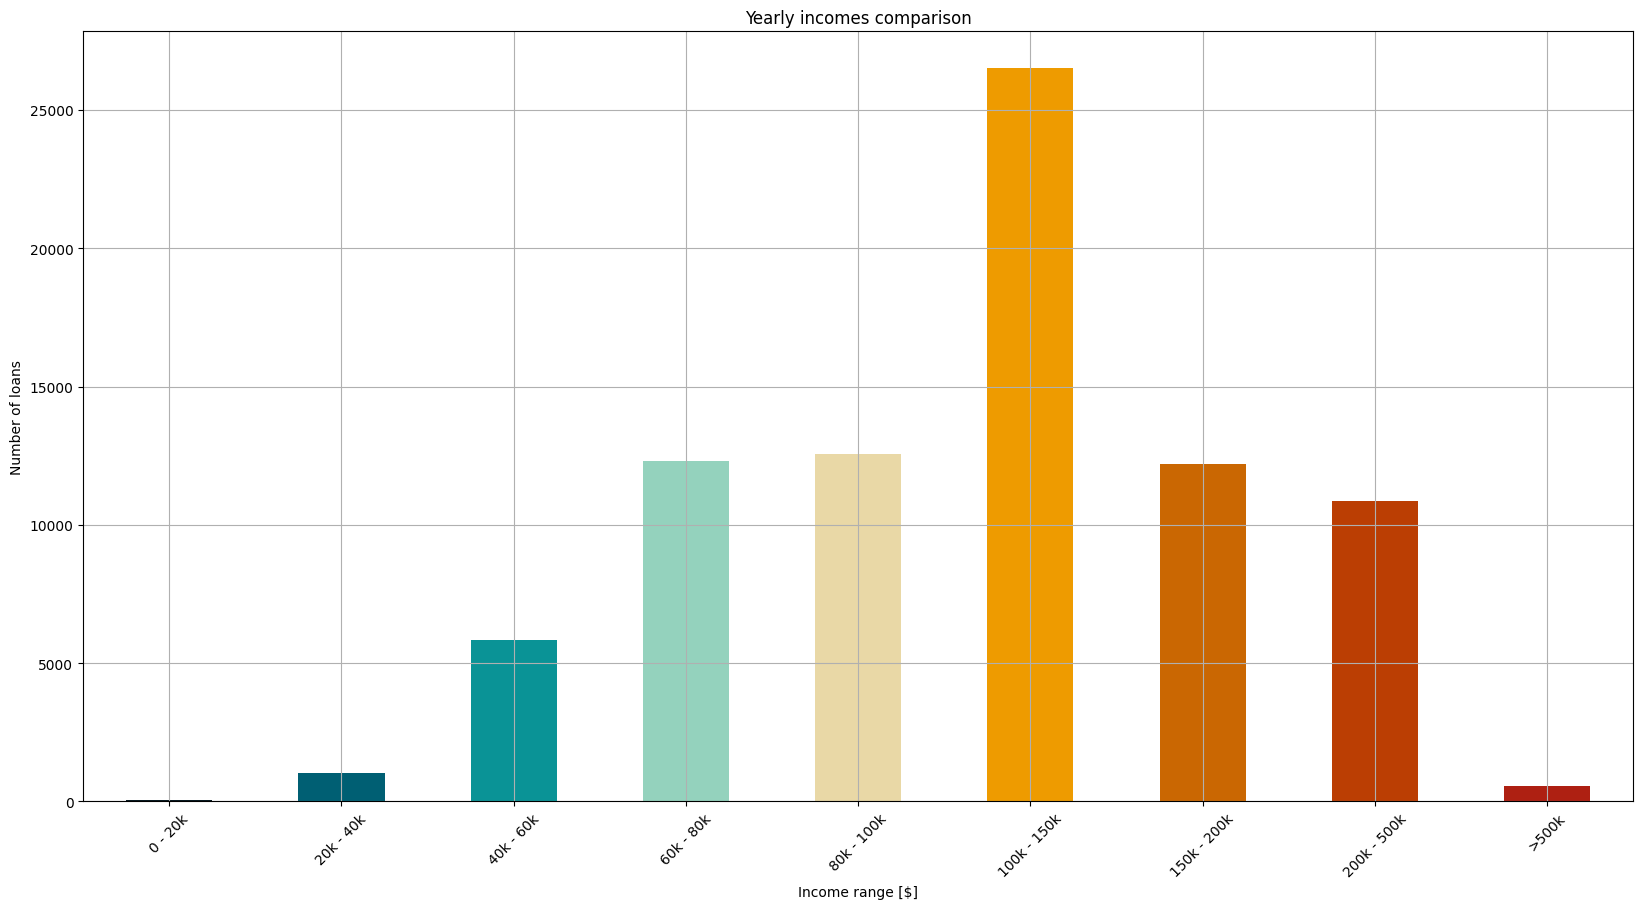

In [3]:
# Yearly income

yi_xlabels = ['0 - 20k', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 150k', '150k - 200k', '200k - 500k', '>500k']

out = pd.cut(df['Yearly_Income'], bins=[0, 2e4, 4e4, 6e4, 8e4, 1e5, 1.5e5, 2e5, 5e5, 1e9], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=45,
                                           figsize=(20, 10),
                                           title='Yearly incomes comparison',
                                           xlabel='Income range [$]',
                                           ylabel='Number of loans',
                                           grid=True,
                                           color=colors)
axs = ax.set_xticklabels(yi_xlabels)

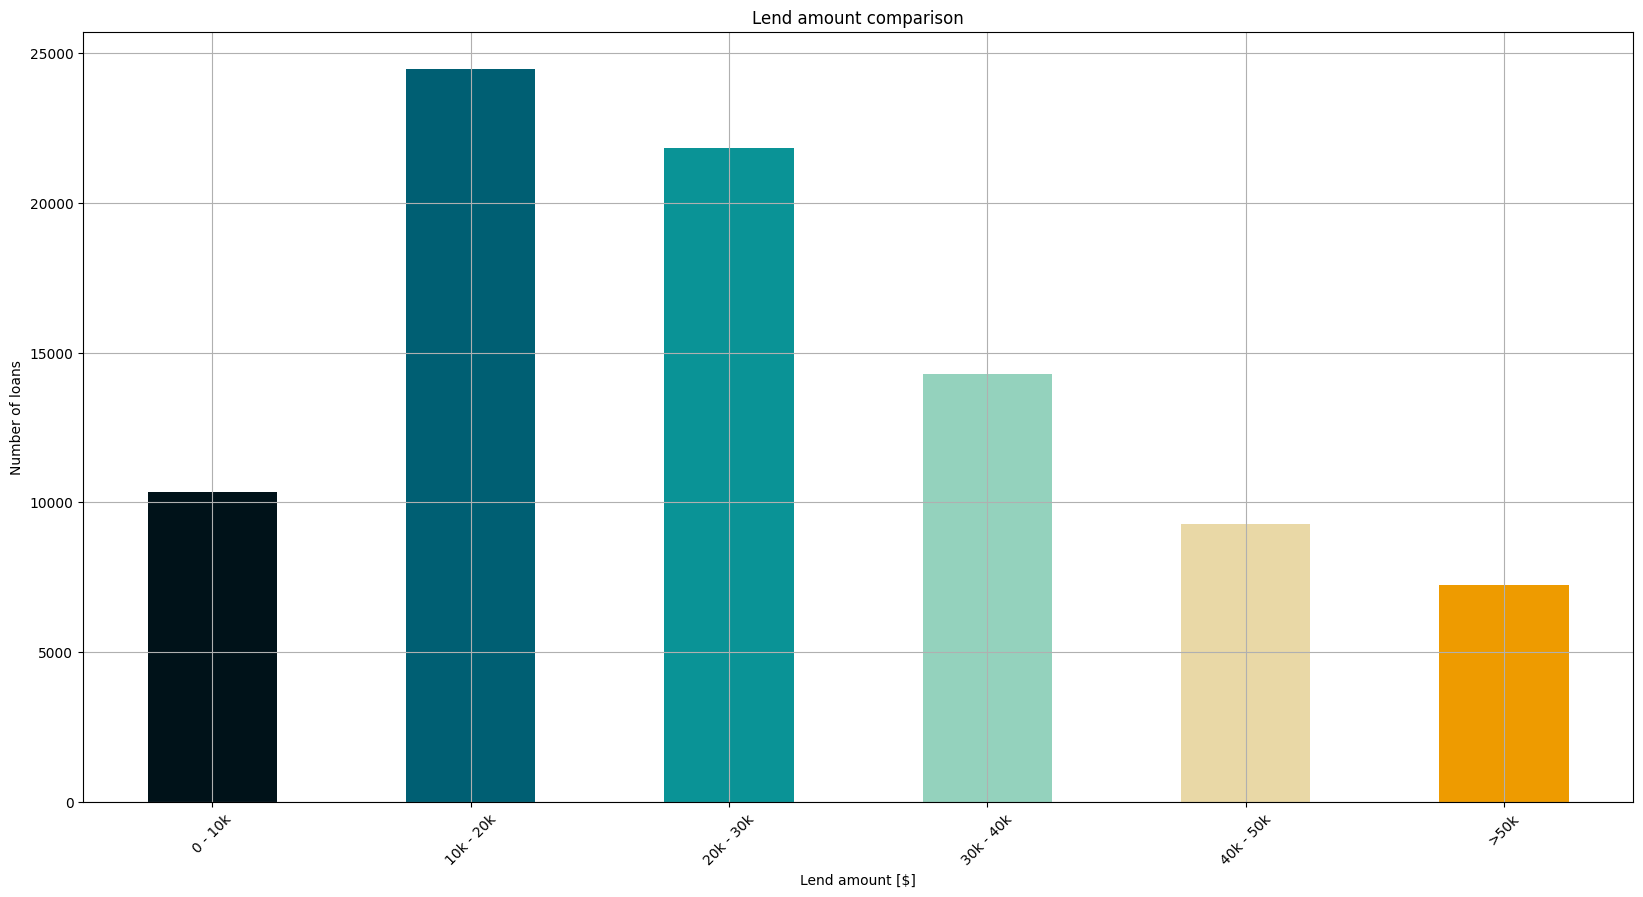

In [4]:
# Lend amount ASC

la_xlabels = ['0 - 10k', '10k - 20k', '20k - 30k', '30k - 40k', '40k - 50k', '>50k']

out = pd.cut(df['Lend_Amount'], bins=[0, 1e4, 2e4, 3e4, 4e4, 5e4, 6e4], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=45,
                                           figsize=(20, 10),
                                           title='Lend amount comparison',
                                           xlabel='Lend amount [$]',
                                           ylabel='Number of loans',
                                           grid=True,
                                           color=colors)
axs = ax.set_xticklabels(la_xlabels)

<AxesSubplot:title={'center':'Work experience comparison'}, xlabel='Work experience', ylabel='Number of people'>

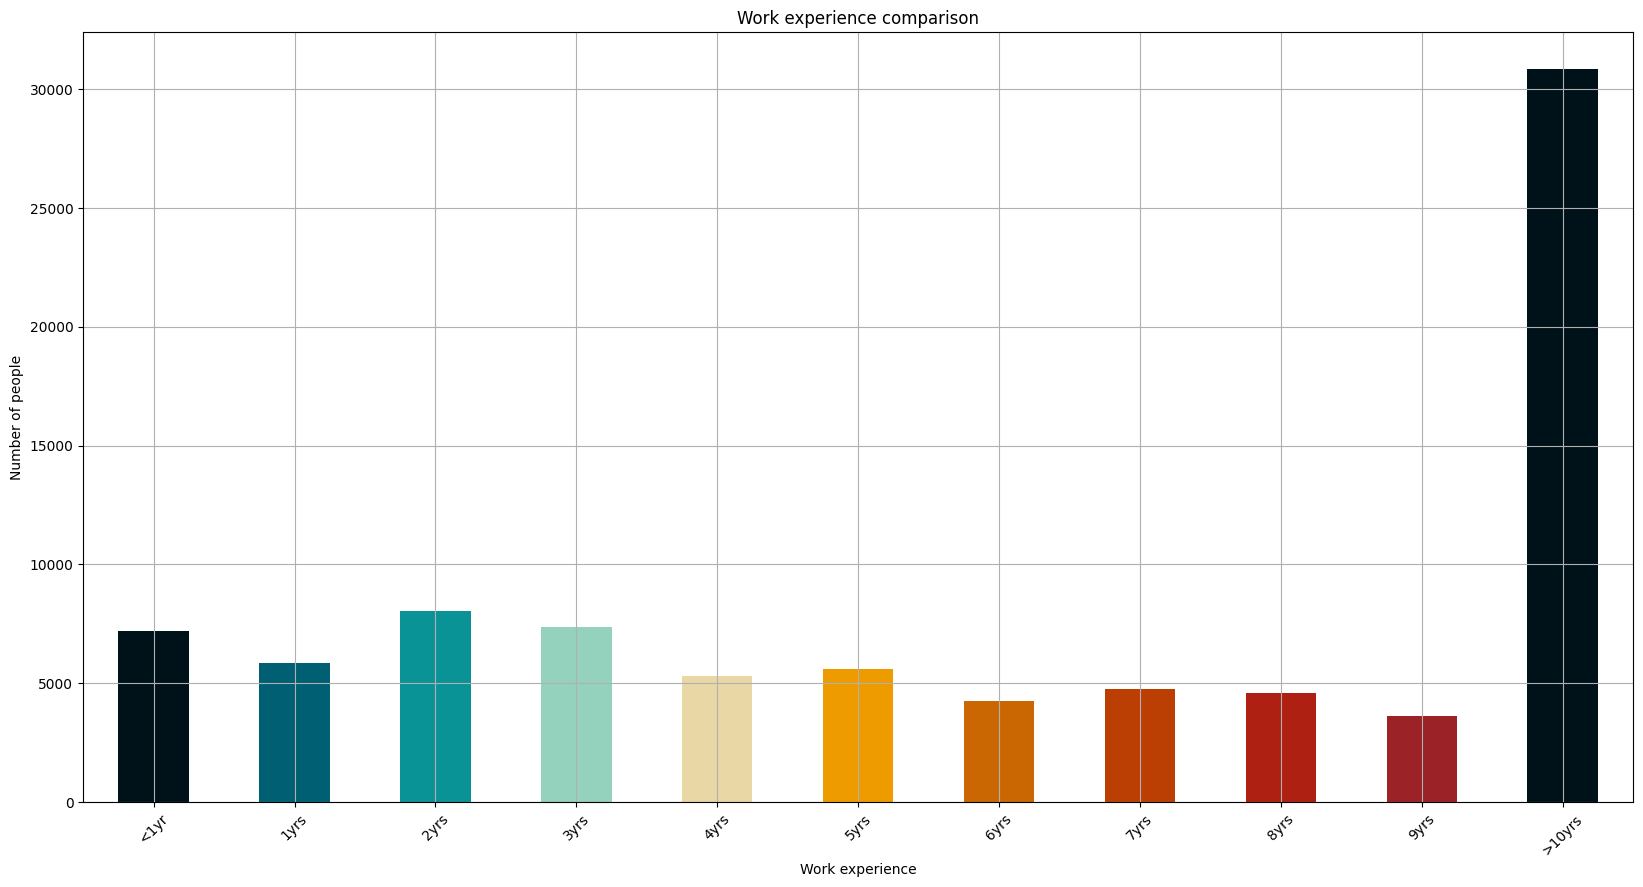

In [5]:
# Experience counts

ec_xlabels = ['<1yr', '1yrs', '2yrs', '3yrs', '4yrs', '5yrs', '6yrs', '7yrs', '8yrs' ,'9yrs' ,'>10yrs']
df.Experience.value_counts().reindex(ec_xlabels).plot.bar(rot=45,
                                                          figsize=(20, 10),
                                                          title='Work experience comparison',
                                                          xlabel='Work experience',
                                                          ylabel='Number of people',
                                                          grid=True,
                                                          color=colors)

<AxesSubplot:title={'center':'Home Status comparison'}, xlabel='Home status', ylabel='Number of people'>

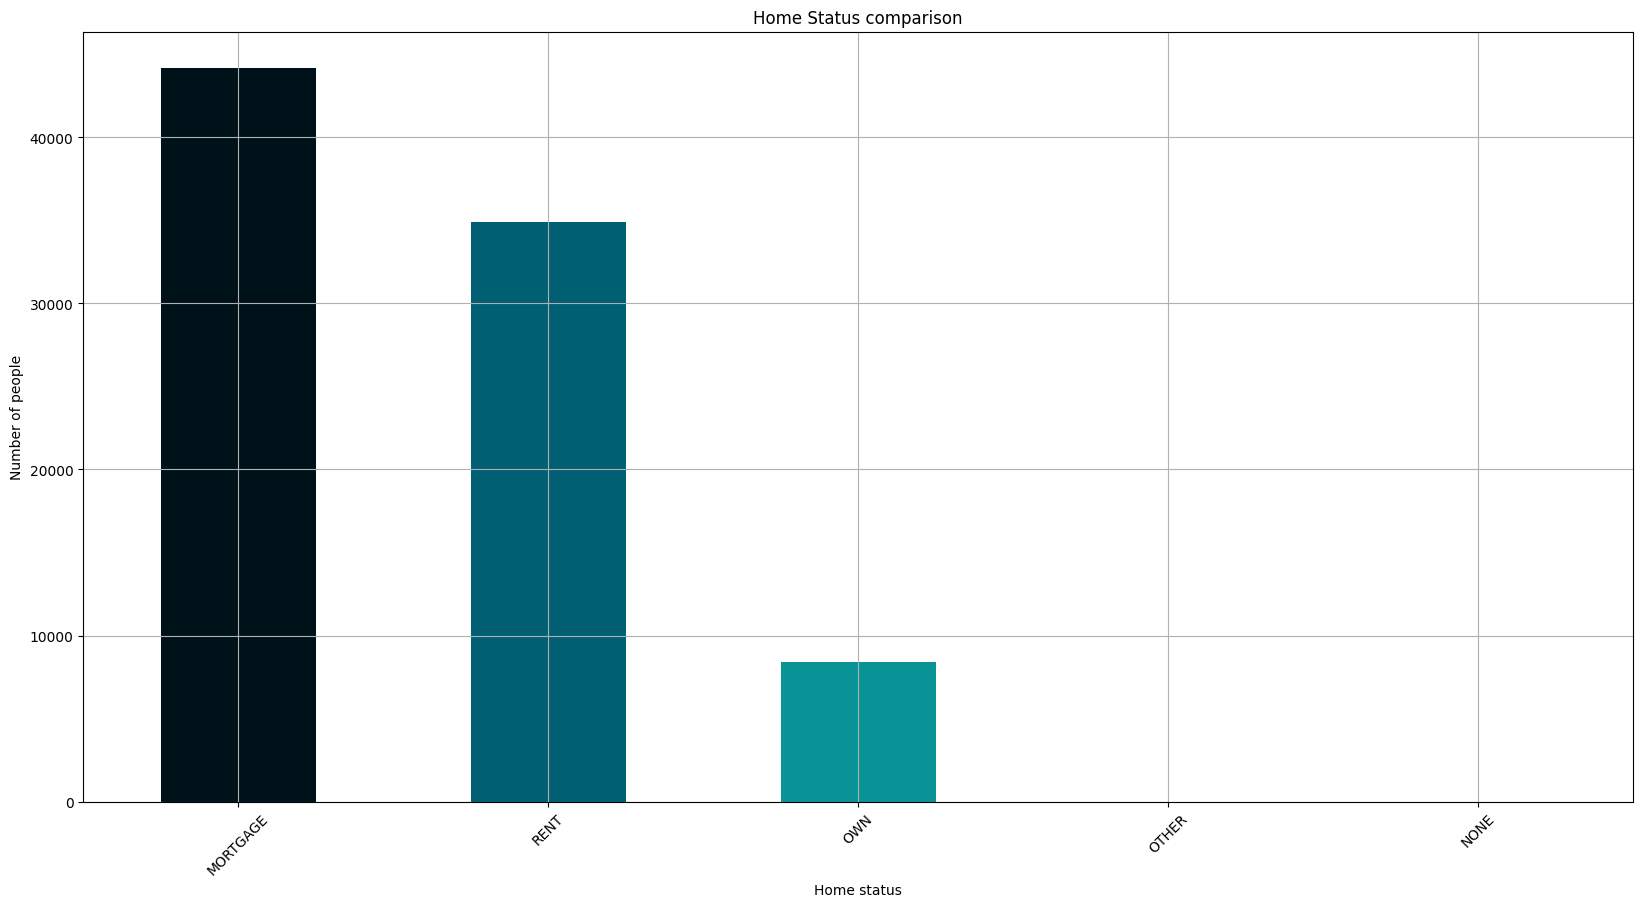

In [6]:
# Home status counts

df.Home_Status.value_counts().plot.bar(rot=45,
                                       figsize=(20, 10),
                                       title='Home Status comparison',
                                       xlabel='Home status',
                                       ylabel='Number of people',
                                       grid=True,
                                       color=colors)

<AxesSubplot:title={'center':'Reasons for taking a loan'}, xlabel='Reason', ylabel='Number of people'>

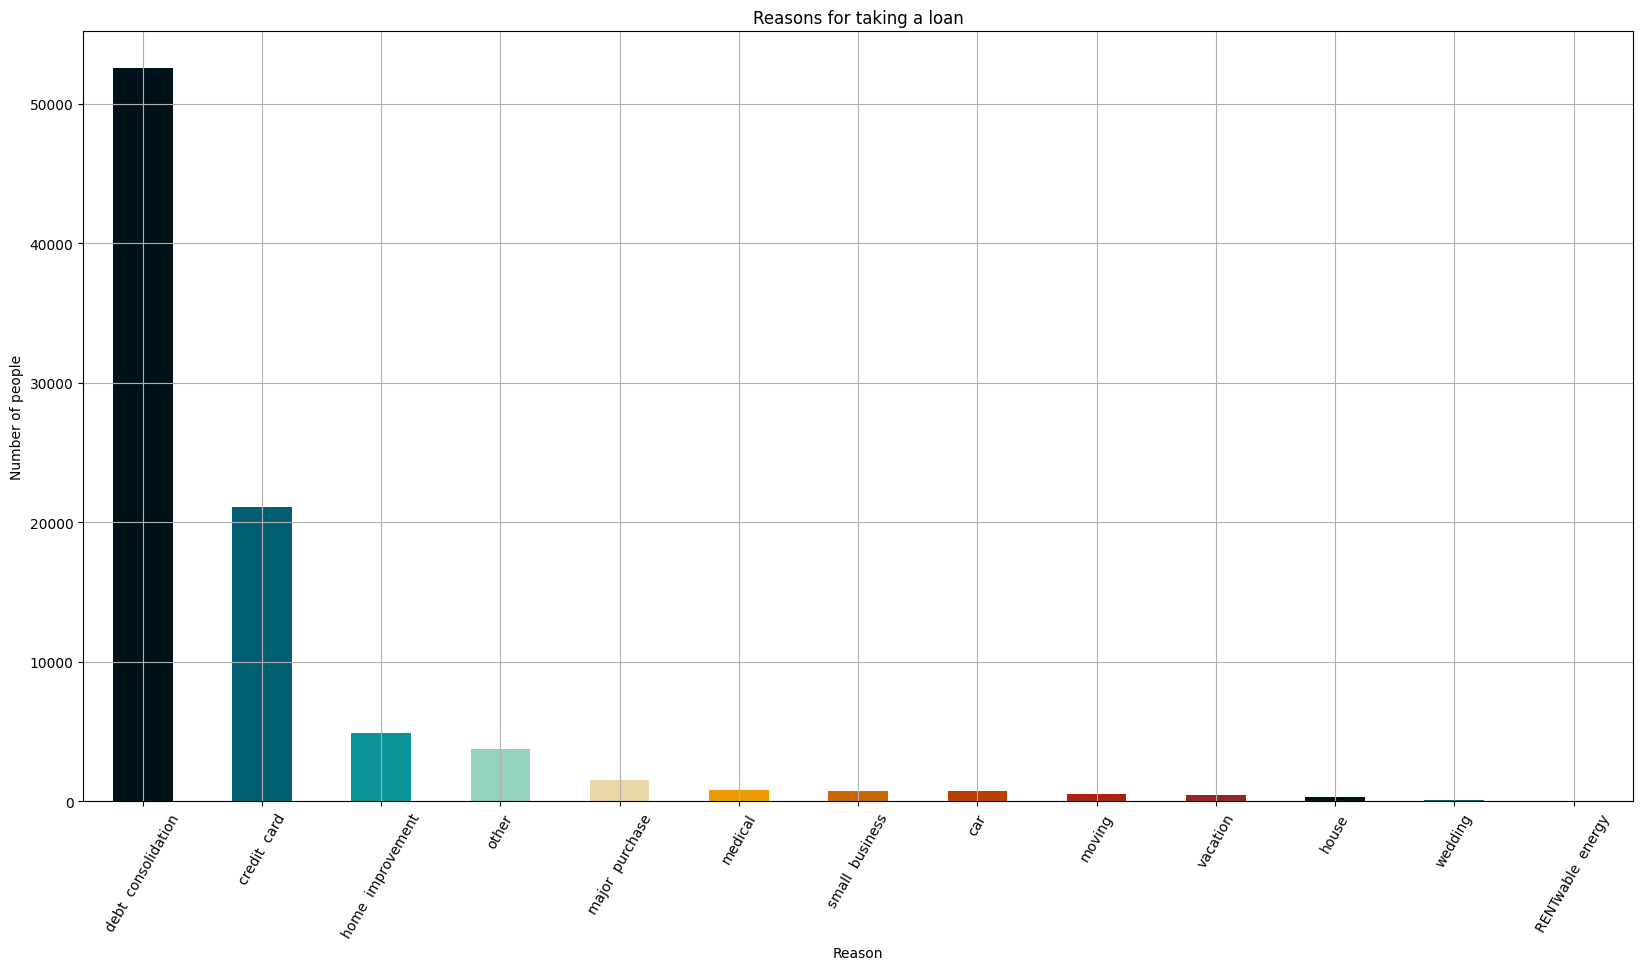

In [7]:
# Reason

df.Reason.value_counts().plot.bar(rot=60,
                                  figsize=(20, 10),
                                  title='Reasons for taking a loan',
                                  xlabel='Reason',
                                  ylabel='Number of people',
                                  grid=True,
                                  color=colors)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


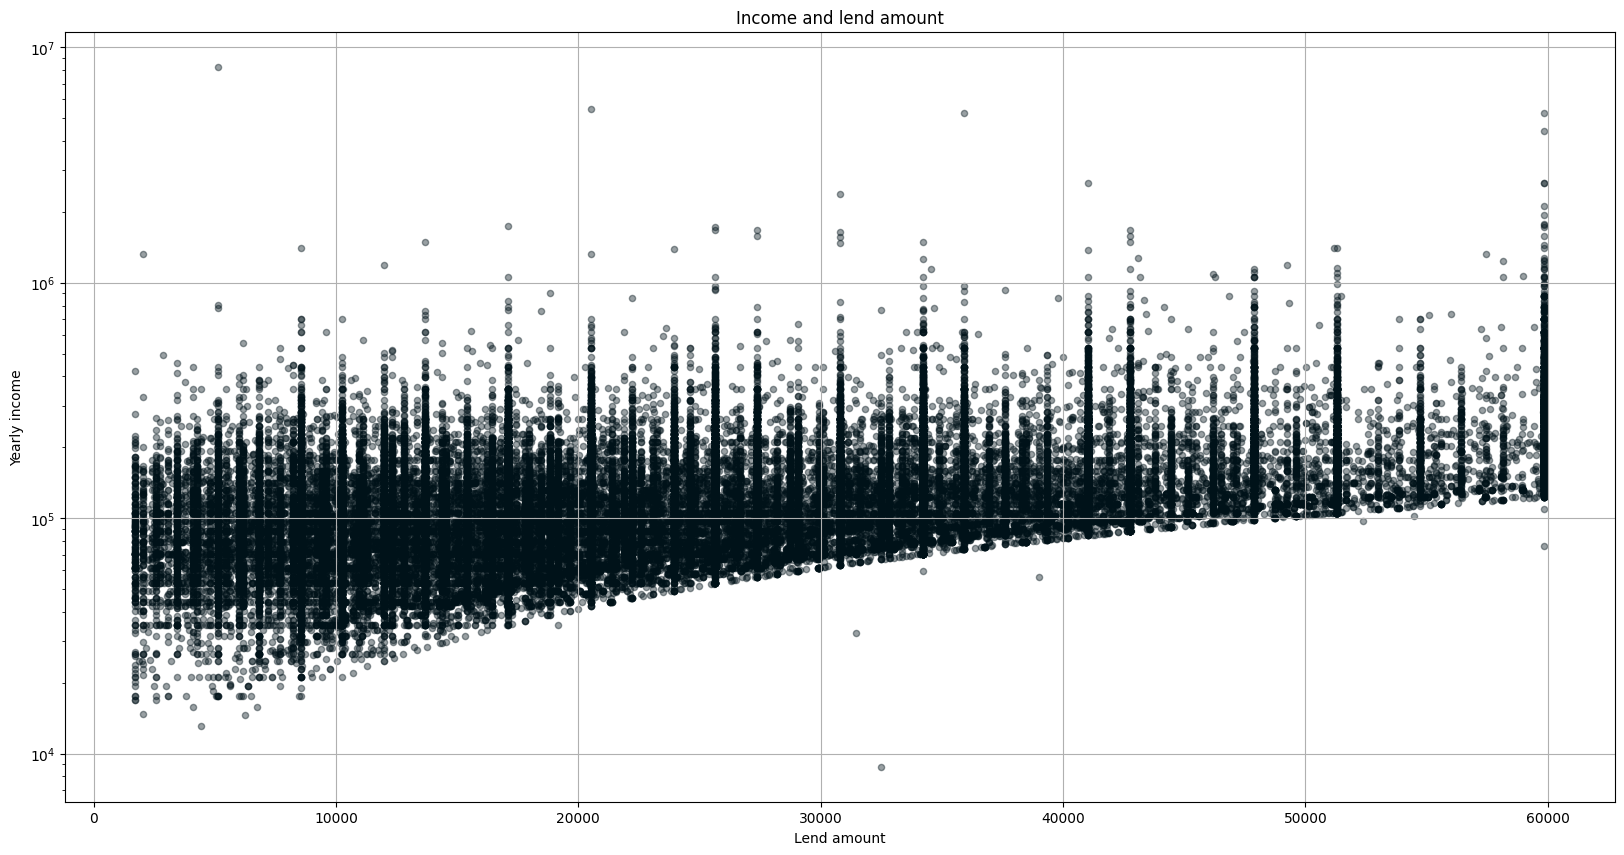

In [8]:
# Yearly income vs Lend Amount
ax = df.plot.scatter(x='Lend_Amount',
                     y='Yearly_Income',
                     figsize=(20, 10),
                     xlabel='Lend amount',
                     ylabel='Yearly income',
                     title='Income and lend amount',
                     alpha=0.4,
                     color=colors[0],
                     grid=True
                     )
ax.set_yscale('log')

In [9]:
# USA heatmap
usa_map = gpd.read_file('usa_map_data/usa-states-census-2014.shp')
# usa_map.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')
# ax.asis('off')
# ax.set_title('test123', fontdict={'fontsize': '25', 'fontweight': '3'})
# df.plot(column = col)

In [10]:
state_count = {}

for row in usa_map.iloc:
    state_count[row['NAME'].replace(' ','').lower()] = 0
    state_count[row['STUSPS'].lower()] = 0

for row in df.iloc:
    try:
        state_count[row['State'].lower()] += 1
    except KeyError:
        continue

In [11]:
keys_list = list(state_count)
filtered_state_count = {}

for i in range(0, len(state_count), 2):
    filtered_state_count[keys_list[i + 1]] = max(
        state_count[keys_list[i]],
        state_count[keys_list[i + 1]]
    )
    
list_for_df = []

for row in usa_map.iloc:
    list_for_df.append(filtered_state_count[row['STUSPS'].lower()])
    
usa_map['CUSTOMER_COUNT'] = list_for_df

(-127.6146362, -64.0610978, 23.253819649999997, 50.628669349999996)

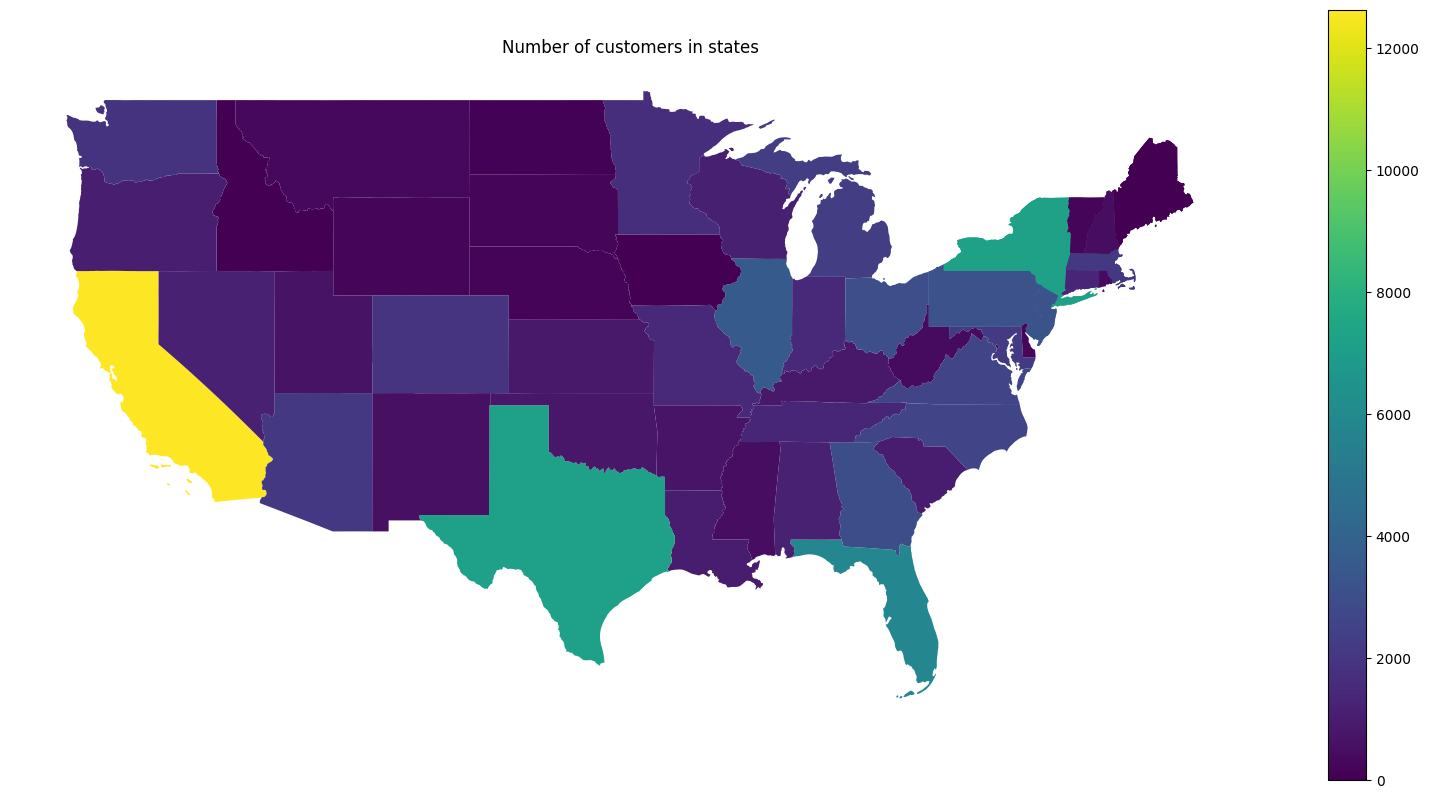

In [16]:
usa_ax = usa_map.plot(column='CUSTOMER_COUNT',
                      legend='True',
                      figsize=(20, 10))
usa_ax.set_title('Number of customers in states')
usa_ax.axis('off')